# Exercises for using Matplotlib

## Exercise 1: Visualise the points as scatter plots and show the regression line

### Preparation for Exercise 1

#### 1) Loading Data from a JSON file

**JSON (JavaScript Object Notation)** is a lightweight, text-based data interchange format that's easy for humans to read and write. Despite its name, JSON is language-independent and widely used for data storage and exchange.

The `json.load()` function:
- Reads JSON data from a file object and converts it to Python data structures
- JSON objects become Python dictionaries
- JSON arrays become Python lists

This is particularly useful for loading structured data like the Anscombe datasets we'll be working with.

In [2]:
# Load json module
import json

# Create a file open context manager and load dict from JSON
json_path = '../Data/exercise/anscombe.json'
with open(json_path, 'r') as fobj:
    data_dict = json.load(fobj)

# Print the data using the items method of the dict
for key, value in data_dict.items():
    print(key)
    print(value)

dataset1
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]}
dataset2
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]}
dataset3
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]}
dataset4
{'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], 'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}


#### 2) Using np.polyfit to generate a linear fit
A linear fit is a polynomial of grade 1

`np.polyfit()` is a NumPy function that performs polynomial fitting to data points. It finds the coefficients of a polynomial of specified degree that best fits the data using least squares regression.

**Basic Usage**:
- **Simple fit**: `coefficients = np.polyfit(x, y, degree)`
- **Full output**: `coefficients, residuals, rank, singular_values = np.polyfit(x, y, degree, full=True)`

**Parameters**:
- `x`, `y`: Input data points (arrays)
- `degree`: Degree of the polynomial (1 for linear, 2 for quadratic, etc.)
- `full=True`: Returns additional fitting statistics including residuals

**For Linear Regression (degree=1):**
- Returns coefficients `[m, b]` for equation `y = mx + b`
- With `full=True`, also returns sum of squared residuals (measure of fit quality)

**Companion Functions**:
- `np.polyval(coefficients, x)`: Evaluates the polynomial at given x values
- Useful for plotting the fitted line: `y_fit = np.polyval(coefficients, x_data)`

This function is particularly useful for analysing relationships in data and creating trend lines for visualisation.

In [3]:
# Import matplotlib and NumPy
import matplotlib.pyplot as plt
import numpy as np

# Get the first dataset, then get its x and y value
dataset = data_dict['dataset1']
x = dataset['x']
y = dataset['y']

# Do the polynomial fit
fit = np.polyfit(x, y, 1)
print(f'for y = mx + b, m={fit[0]}, b={fit[1]}')

# Also get the sum of squared residuals
fit, sum_sq_res, *_ = np.polyfit(x, y, 1, full=True)
sum_sq_res

for y = mx + b, m=0.5000909090909094, b=3.000090909090908


array([13.76269])

### **Task** for Exercise 1:
We can use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for a simple linear regression. Use this to visualise and fit [Anscombe's quartett](https://www.jstor.org/stable/2682899?seq=4) (compare your results with figures 1-4 in the article) using the data located in `exercise_data/anscombe.json`.

Visualise the points as scatter plots and show the regression line. Give labels to the axes and try to vary the colours of the individual components. Use `np.polyval()` to evaluate the fitted polynomial and create the regression line for plotting. If you want, you can also create a separate plot for the fitting statistics. For the reference about the plot types in Matplotlib (including scatter plots) look [here](https://matplotlib.org/stable/plot_types/index.html).

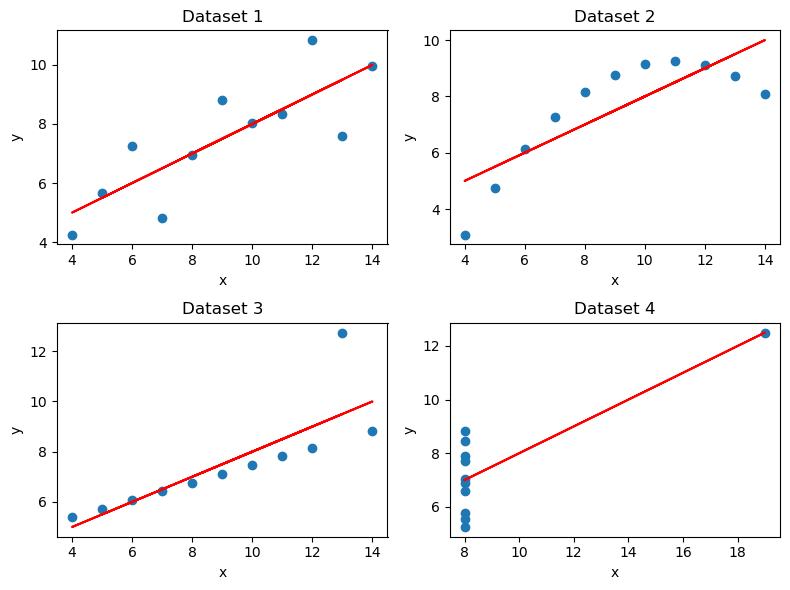

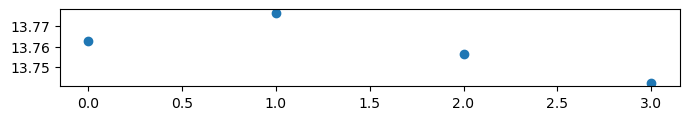

In [8]:
### Your solution here

# Create a figure and subplots for the regression lines
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Create a figure and subplot for the fitting statistics
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 1))

# Create scatter plots for every regression line
for i, ax in enumerate(axs.flat):
    data = data_dict[f'dataset{i+1}']
    x = np.array(data['x'])
    y = np.array(data['y'])
    ax.scatter(x, y)
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x_fit, residuals, *_ = np.polyfit(x, y, 1, full=True)
    y_fit = np.polyval(x_fit, x)
    ax.plot(x, y_fit, color='red')
    ax2.scatter(i, residuals, color='C0')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Exercise 2: Create different types of visualisations

### Preparation for Exercise 2

Before starting Exercise 2, let's briefly introduce some additional Matplotlib plotting functions. For subplots created with `fig, axes = plt.subplots()`, you get access to each of them using the notation `axes[i,j]` at row `i` and column `j` (for 2D subplot grids). On each of them, you can choose which type of visualisations to create:

**`axes[i,j].hist()`** - Creates histograms to show the distribution of data:
- Shows frequency of values in bins
- Useful for understanding data distribution
- Basic usage: `ax.hist(data, bins=number_of_bins)`

**`axes[i,j].scatter()`** - Creates scatter plots to show relationships between two variables:
- Each point represents a data pair (x, y)
- Useful for showing correlations and patterns
- Basic usage: `ax.scatter(x_data, y_data)`
- Can customise with colours, sizes, and markers

**`axes[i,j].matshow()`** - Displays 2D arrays as images/heatmaps:
- Each array element becomes a coloured pixel
- Useful for visualising matrices, grids, or 2D functions
- Basic usage: `ax.matshow(2d_array)`
- Colours represent different values in the array

These functions, combined with `axes[i,j].plot()`, give you a versatile toolkit for creating different types of visualisations in your scientific figures.

### **Task** for Exercise 2: Create a mock of graphs from your field

Create a selection of graphs using `np.linspace`, `np.random.rand` and the NumPy functions that are somewhat representative of a figure you might publish. Use Matplotlib functions such as `subplots()`, `plot()`, `hist()`, `scatter()`, and `matshow()` to create different types of visualisations.

#### 1) Examples of NumPy functions:

- `np.exp` for exponential function,
- `np.sqrt` for square root function,
- `np.sin` for sine function
- `np.cos` for cosine function
- `np.meshgrid` for creating 2D grids

#### 2) Using `np.meshgrid()` to create 2D grids for plotting

`np.meshgrid()` is a NumPy function that creates coordinate matrices from coordinate vectors. It's particularly useful for creating 2D grids for plotting surfaces, contours, or evaluating functions over a 2D domain.

**Basic Usage**:
```python
xx, yy = np.meshgrid(x_array, y_array)
```

**What it does**:
- Takes two 1D arrays representing coordinates along x and y axes
- Returns two 2D arrays where every point (i,j) contains the x and y coordinates
- Creates a rectangular grid of points for 2D plotting

**Example**:
```python
x = np.linspace(0, 2, 3)  # [0, 1, 2]
y = np.linspace(0, 1, 2)  # [0, 1]
xx, yy = np.meshgrid(x, y)
# xx = [[0, 1, 2],    yy = [[0, 0, 0],
#       [0, 1, 2]]          [1, 1, 1]]
```

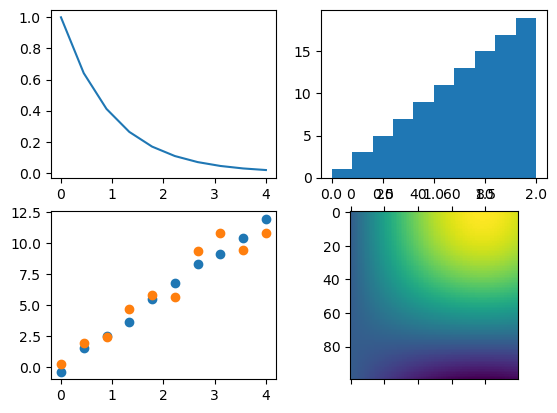

In [12]:
### Your solution here

# Create data for x1 and y1 using 'np.linspace' and the numpy functions
x1 = np.linspace(0, 4, 10)
y1 = np.exp(-x1)

# Create data for x2 and y2 using 'np.linspace' and the numpy functions
x2 = np.linspace(0, 4, 100)
y2 = np.sqrt(x2)

# Create random data y3a and y3b from x1 using 'np.random.rand'
y3a = x1 * 3 + (np.random.rand(10) - 0.5)
y3b = x1 * 3 + 3 * (np.random.rand(10) - 0.5)

# Create meshgrid xx and yy and data zz
xx, yy = np.meshgrid(np.linspace(0, 2, 100,), np.linspace(0, 2, 100))
zz = np.sin(xx) * np.cos(yy)

# Create figure and axes
fig, axes = plt.subplots(2, 2)

# Plot data y1 on subplot(0,0), y2 on subplot(0,1), y3a and y3b on subplot(1,0), zz on subplot(1,1)
axes[0, 0].plot(x1, y1)
axes[0, 1].hist(y2)
axes[1, 0].scatter(x1, y3a)
axes[1, 0].scatter(x1, y3b)
axes[1, 1].matshow(zz)

## Exercise 3: Create your own style

### **Task** for Exercise 3: Try to build a presentation style and a publication style that fits your needs

Available options can be found [here](https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc). 